In [159]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from matplotlib import pyplot

In [160]:
data = pd.read_csv('IPBA Dataset - NEW IPBA_BYOP DATASET.csv')
print(data.columns,'\n')
#print(data,'\n')
print(data.describe())
#[3900 rows x 28 columns]
#จำนวน max min และอื่นๆ ดูได้จาก data.describe()

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase \nAmount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review \nRating', 'Subscription \nStatus', 'Payment \nMethod',
       'Shipping \nType', 'Discount \nApplied', 'Promo Code\n Used',
       'Previous\n Purchases', 'Preferred Payment\n Method',
       'Frequency of\n Purchases', 'Previous Purchased \nAmount (USD)',
       'Average \nOrder Value (USD)',
       'Total Sales \nRevenue Per Customer (USD)',
       'Time spend on website  Minutes', ' clicks ',
       'total number of impressions', 'Click-through rate (CTR)',
       'Website Traffic', 'Conversion\n Rate %'],
      dtype='object') 

       Customer ID          Age  Review \nRating  Previous\n Purchases  \
count  3900.000000  3900.000000      3900.000000           3900.000000   
mean   1950.500000    44.068462         3.749949             25.351538   
std    1125.977353    15.207589         0.716223             14.447125   
min    

In [161]:
#data preparetion
data['Total Sales \nRevenue Per Customer (USD)'] = data['Total Sales \nRevenue Per Customer (USD)'].str.replace('$', '')
data['Total Sales \nRevenue Per Customer (USD)'] = data['Total Sales \nRevenue Per Customer (USD)'].astype(float)
data['Purchase \nAmount (USD)'] = data['Purchase \nAmount (USD)'].str.replace('$', '')
data['Purchase \nAmount (USD)'] = data['Purchase \nAmount (USD)'].astype(float)
dummy = pd.get_dummies(data['Gender'])
data = pd.concat([data, dummy], axis = 'columns')
data.drop('Gender', axis=1, inplace=True)
print(data)
#เราทำการ Selection Attributes ที่เราจะใช้มาทำการ clean data โดยเอาตัว $ ออกเพื่อนำไปคำนวณได้
#ทำให้ gender จาก Male, Female เป็น 0, 1 เพื่อคำนวณให้ง่ายขึ้น

      Customer ID  Age Item Purchased     Category  Purchase \nAmount (USD)  \
0               1   55         Blouse     Clothing                     53.0   
1               2   19        Sweater     Clothing                     64.0   
2               3   50          Jeans     Clothing                     73.0   
3               4   21        Sandals     Footwear                     90.0   
4               5   45         Blouse     Clothing                     49.0   
...           ...  ...            ...          ...                      ...   
3895         3896   40         Hoodie     Clothing                     28.0   
3896         3897   52       Backpack  Accessories                     49.0   
3897         3898   46           Belt  Accessories                     33.0   
3898         3899   44          Shoes     Footwear                     77.0   
3899         3900   52        Handbag  Accessories                     81.0   

           Location Size      Color  Season  Review

<ipython-input-161-e1803569e703>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Total Sales \nRevenue Per Customer (USD)'] = data['Total Sales \nRevenue Per Customer (USD)'].str.replace('$', '')
<ipython-input-161-e1803569e703>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Purchase \nAmount (USD)'] = data['Purchase \nAmount (USD)'].str.replace('$', '')


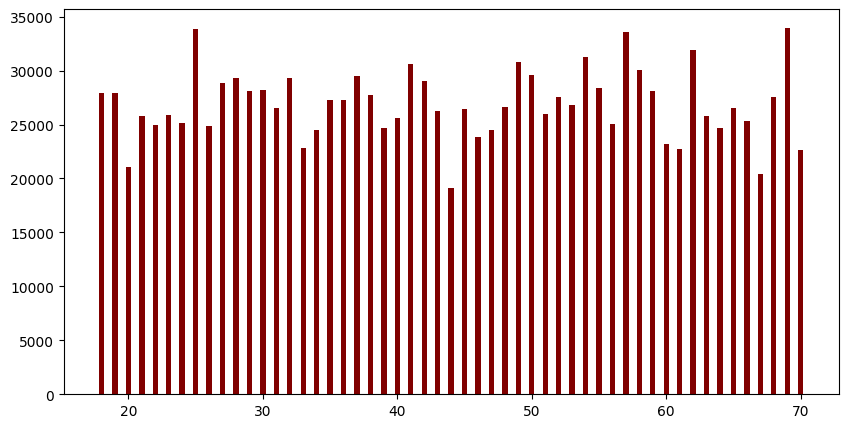

In [162]:
data_group = data[['Age', 'Total Sales \nRevenue Per Customer (USD)']]
data_age = data_group.groupby('Age').sum()
#define figsize of graph
ig = plt.figure(figsize = (10, 5))
Total = data_age['Total Sales \nRevenue Per Customer (USD)']
# creating the bar plot
plt.bar(np.sort(data['Age'].unique()), Total, color ='maroon', width = 0.4)
plt.show()
#วาดบาร์กราฟโดยนำ อายุ กับ ยอดขายรวมต่อลูกค้า

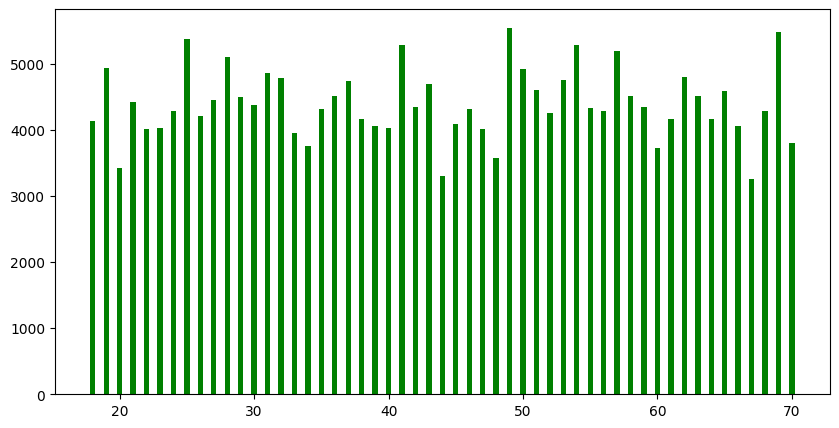

In [163]:
data_group = data[['Age', "Purchase \nAmount (USD)"]]
data_age = data_group.groupby('Age').sum()
#define figsize
ig = plt.figure(figsize = (10, 5))
Purchase = data_age['Purchase \nAmount (USD)']
# creating the bar plot
plt.bar(np.sort(data['Age'].unique()), Purchase, color ='green', width = 0.4)
plt.show()
#วาดบาร์กราฟโดยนำ อายุ กับ ยอดการซื้อของที่ลูกค้าซื้อ

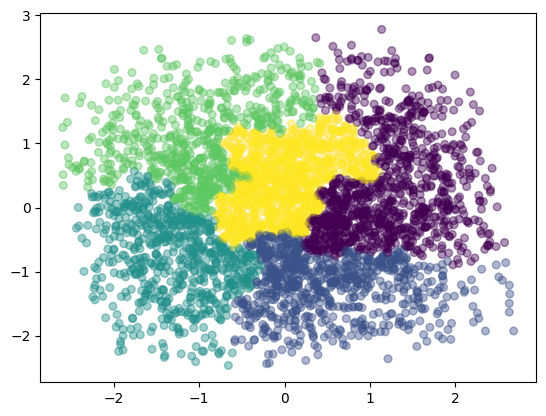

In [164]:
X = data[["Age", "Total Sales \nRevenue Per Customer (USD)", "Purchase \nAmount (USD)", "Male",'Website Traffic']]
#เราเลือก columns อายุ ยอดขายรวมต่อคนซื้อ ยอดขาย เพศ และการกดเข้าเว็บไซต์ เป็นคอลั่มหลักในการ clustering ในแต่ละ model
scale = StandardScaler()
X_normalized = scale.fit_transform(X)
# nomalized data and define pca
pca = PCA(n_components=2)
pca = pca.fit_transform(X_normalized)
# define the model of Agglomerative
model = AgglomerativeClustering(n_clusters= 5)
labels = model.fit_predict(pca)
data['segment'] = labels
# fit model and predict clusters
yhat=model.fit_predict(X_normalized)
clusters=unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
# get row indexes for samples with this cluster
  row_ix=where(yhat==cluster)
  # create scatter of these samples
  plt.scatter(pca[:,0], pca[:,1], c=labels, s=30, alpha=0.1)
plt.show()
#เราใช้การแบ่งกลุ่ม 5 กลุ่ม เพื่อให้เห็นความหนาแน่นและการแบ่งกลุ่มได้ชัดเจนมากขึ้น

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


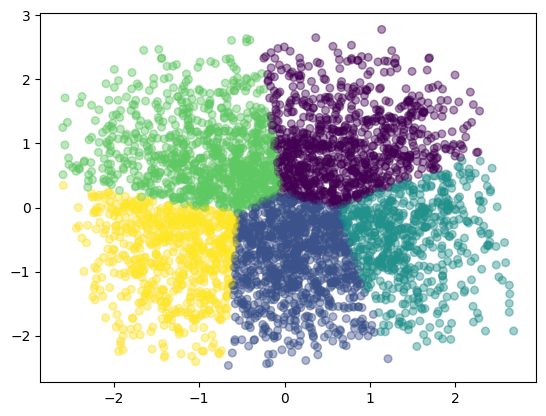

In [165]:
# define KMeans model
model = KMeans(n_clusters= 5)
labels = model.fit_predict(pca)
#creat datafram segment to be the label
data['segment'] = labels
# fit model and predict clusters
yhat=model.fit_predict(X_normalized)
clusters=unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
# get row indexes for samples with this cluster
  row_ix=where(yhat==cluster)
  # create scatter of these samples
  plt.scatter(pca[:,0], pca[:,1], c=labels, s=30, alpha=0.1)
plt.show()
#เราใช้การแบ่งกลุ่ม 5 กลุ่ม เพื่อให้เห็นความหนาแน่นและการแบ่งกลุ่มได้ชัดเจนมากขึ้น

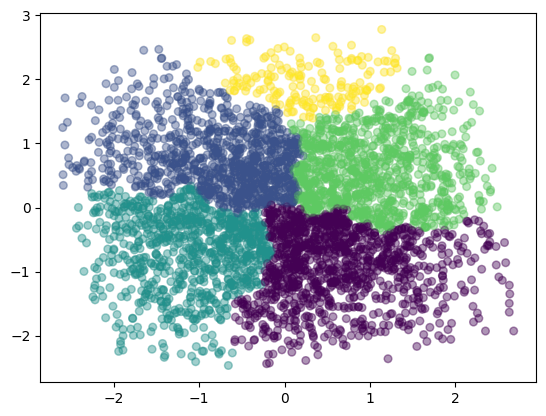

In [166]:
# define the model KMeans
model = Birch(threshold=0.01, n_clusters=5)
labels = model.fit_predict(pca)
#creat datafram segment to be the label
data['segment'] = labels
# fit model and predict clusters
yhat=model.fit_predict(X_normalized)
clusters=unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
# get row indexes for samples with this cluster
  row_ix=where(yhat==cluster)
  # create scatter of these samples
  plt.scatter(pca[:,0], pca[:,1], c=labels, s=30, alpha=0.1)
plt.show()
#เราใช้การแบ่งกลุ่ม 5 กลุ่ม เพื่อให้เห็นความหนาแน่นและการแบ่งกลุ่มได้ชัดเจนมากขึ้น

In [169]:
# print(data['segment'])
# print(labels)

0       2
1       3
2       2
3       1
4       1
       ..
3895    1
3896    1
3897    3
3898    1
3899    2
Name: segment, Length: 3900, dtype: int64
[2 3 2 ... 3 1 2]
